# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | cockburn town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | deniliquin
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | chernyshevsk
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | abra pampa
Processing Record 12 of Set 1 | tha khanon
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | brisas de zicatela
Processing Record 17 of Set 1 | treasure island
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | sinop
Processing Record 21 of Set 1 | azul
Processing Record 22 of Set 1 | sandnessjoen
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.29,73,9,3.87,PN,1737842362
1,cockburn town,21.4612,-71.1419,25.98,100,0,5.66,TC,1737842363
2,ushuaia,-54.8000,-68.3000,14.81,44,20,7.20,AR,1737842365
3,deniliquin,-35.5333,144.9667,22.49,42,80,3.84,AU,1737842366
4,new norfolk,-42.7826,147.0587,14.28,55,76,1.07,AU,1737842367


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.29,73,9,3.87,PN,1737842362
1,cockburn town,21.4612,-71.1419,25.98,100,0,5.66,TC,1737842363
2,ushuaia,-54.8000,-68.3000,14.81,44,20,7.20,AR,1737842365
3,deniliquin,-35.5333,144.9667,22.49,42,80,3.84,AU,1737842366
4,new norfolk,-42.7826,147.0587,14.28,55,76,1.07,AU,1737842367


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

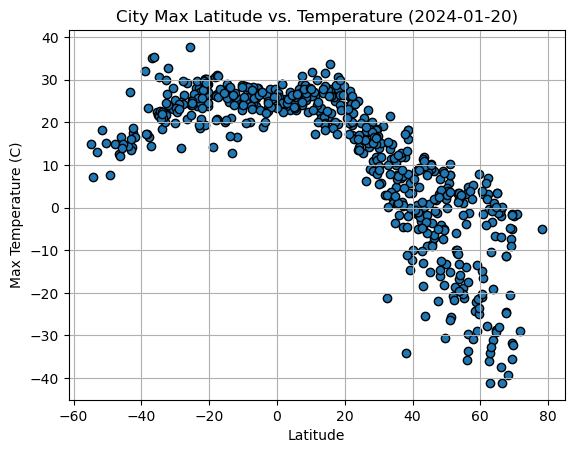

In [8]:
# Build scatter plot for latitude vs. temperature
###Angel helped me add the edgecolors and linewidth to the marker 
lat_values = city_data_df["Lat"]
temp_values = city_data_df["Max Temp"]
plt.scatter(lat_values,temp_values,marker="o", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-01-20)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

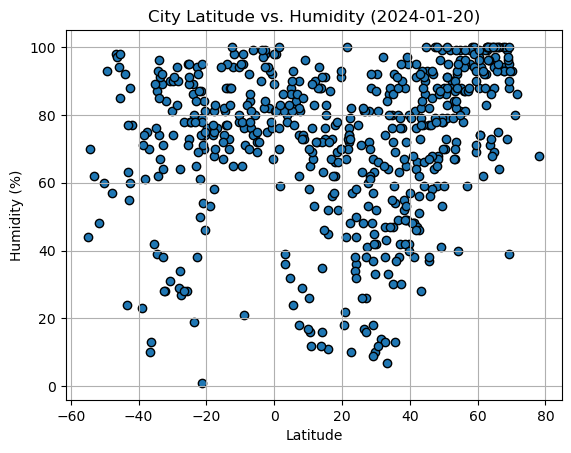

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df["Humidity"]
plt.scatter(lat_values,humidity_values,marker="o", edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

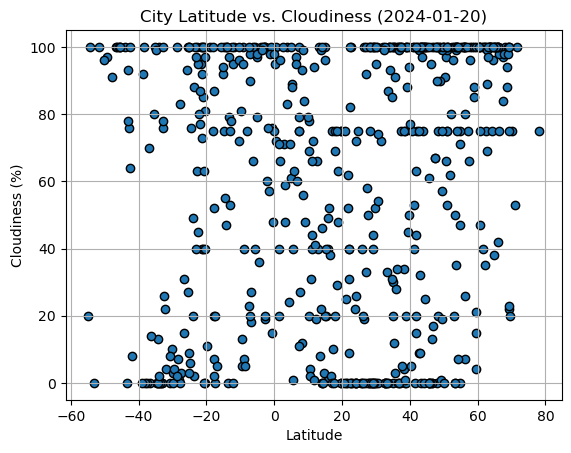

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloud_values = city_data_df["Cloudiness"]
plt.scatter(lat_values,cloud_values,marker="o", edgecolors="black", linewidths=1)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

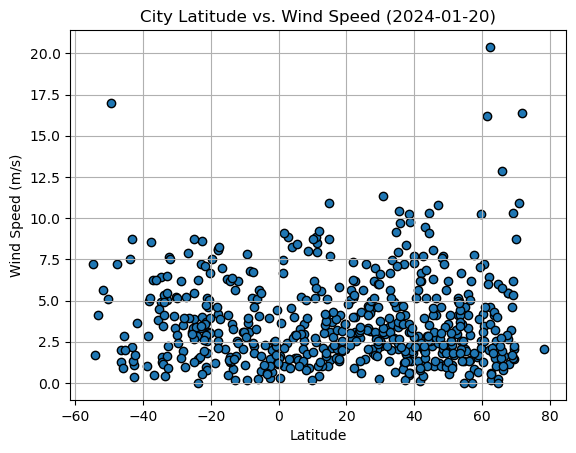

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_values = city_data_df["Wind Speed"]
plt.scatter(lat_values,wind_values, marker="o", edgecolors="black", linewidths=1)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-01-20)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
### Angel helped me with this code during my tutor session
def plot_linear_regression(x_values, y_values, coordinates, label, hemisphere): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.title(f"{hemisphere}: Latitude vs {label}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cockburn town,21.4612,-71.1419,25.98,100,0,5.66,TC,1737842363
6,ribeira grande,38.5167,-28.7000,18.22,88,75,10.28,PT,1737842369
7,iqaluit,63.7506,-68.5145,-19.15,71,100,2.06,CA,1737842371
8,chernyshevsk,52.5243,117.0174,-18.52,90,100,2.98,RU,1737842372
9,vadso,70.0744,29.7487,-1.91,93,75,8.75,NO,1737842373


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.29,73,9,3.87,PN,1737842362
2,ushuaia,-54.8000,-68.3000,14.81,44,20,7.20,AR,1737842365
3,deniliquin,-35.5333,144.9667,22.49,42,80,3.84,AU,1737842366
4,new norfolk,-42.7826,147.0587,14.28,55,76,1.07,AU,1737842367
5,port-aux-francais,-49.3500,70.2167,7.71,93,97,16.97,TF,1737842368


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6820666963363451


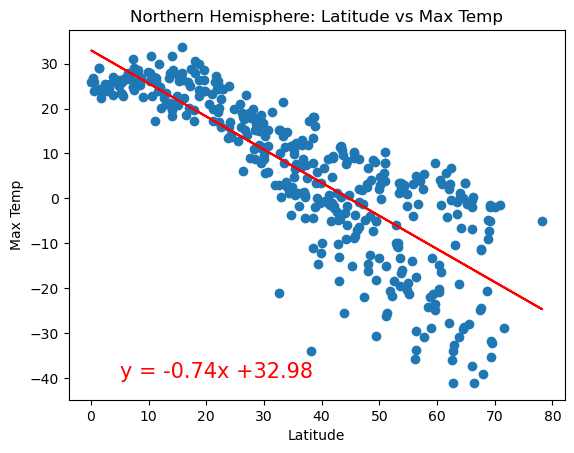

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
hemisphere = "Northern Hemisphere"
plot_linear_regression(x_values,y_values, (5,-40), "Max Temp", hemisphere)



The r^2-value is: 0.20810663032814655


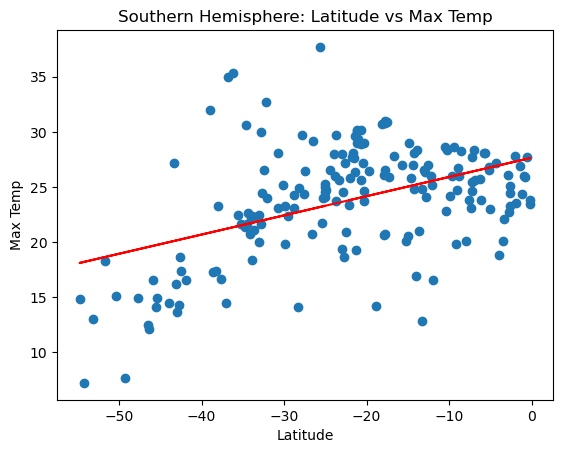

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
hemisphere = "Southern Hemisphere"
plot_linear_regression(x_values,y_values, (-40,5), "Max Temp", hemisphere)


**Discussion about the linear relationship:** 

The Northern Hemisphere exhibits a negative, steeper slope, indicating a strong relationship.  This indicates that temperature decreases more rapidly as latitude increases. In contrast, the Southern Hemisphere shows a positive, gentler slope, meaning temperature increases slightly as latitude approaches the equator. 

Comparing r2 values, the Northern Hemisphere demonstrates a stronger relationship between latitude and temperature, likely due to its larger landmasses and fewer oceans. The greater ocean coverage in the Southern Hemisphere causes temperature variations, thereby weakening the correlation between latitude and temperature.

**Conclusion:**  
Latitude and temperature have a stronger, more predictable relationship in the Northern Hemisphere compared to the Southern Hemisphere, where the relationship is weaker due to the influence of oceans on weather.



### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.12947577510601077


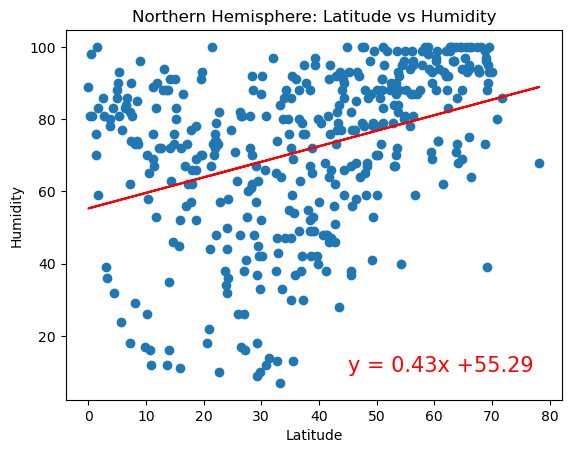

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
hemisphere = "Northern Hemisphere"
plot_linear_regression(x_values,y_values, (45,10), "Humidity", hemisphere)

The r^2-value is: 0.07618673502121817


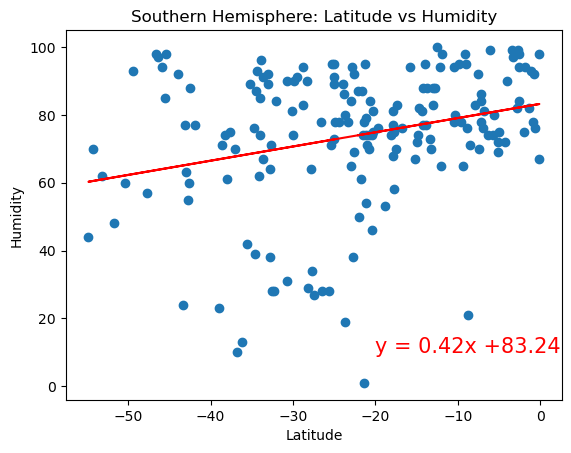

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
hemisphere = "Southern Hemisphere"
plot_linear_regression(x_values,y_values, (-20,10), "Humidity", hemisphere)

**Discussion about the linear relationship:** 

The Northern Hemisphere shows a moderate positive slope, indicating humidity increases with latitude, while the Southern Hemisphere has a gentler positive slope, reflecting a weaker relationship. The r2 value for the Northern Hemisphere (0.129) suggests a slightly stronger correlation compared to the Southern Hemisphere (0.07) , where ocean likely weakens the relationship.

**Conclusion:**

Overall, there appears to be a weak correlation between humidy and latitude for both hemispheres. Humidity has a slightly stronger correlation with latitude in the Northern Hemisphere, while the Southern Hemisphere shows a minimal relationship, likely due to ocean influence. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.07737724824086448


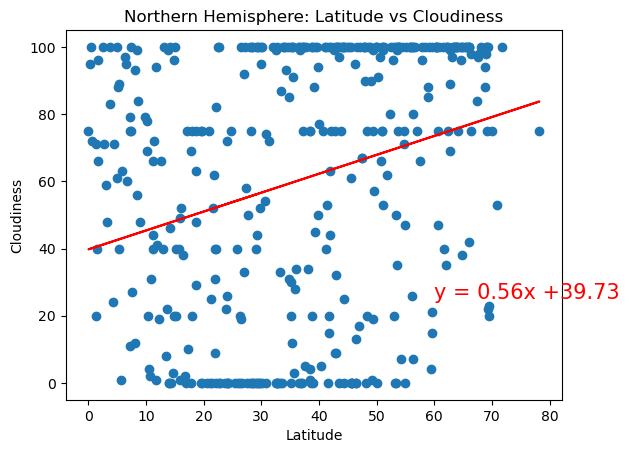

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
hemisphere = "Northern Hemisphere"
plot_linear_regression(x_values,y_values, (60,25), "Cloudiness", hemisphere)

The r^2-value is: 0.017960390879015544


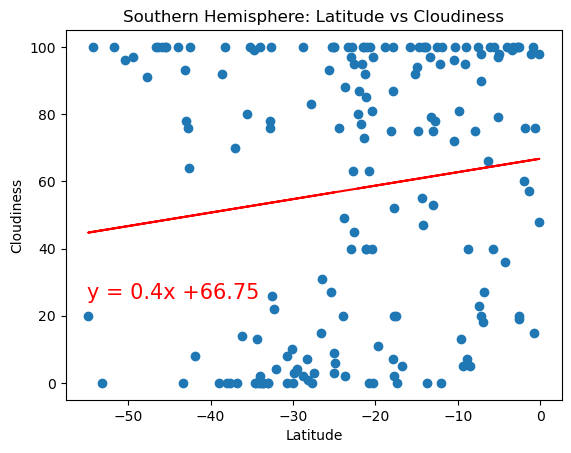

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
hemisphere = "Southern Hemisphere"
plot_linear_regression(x_values,y_values, (-55,25), "Cloudiness", hemisphere)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the regression line shows a positive slope, suggesting a slight increase in cloudiness with latitude. However, the r2 value (0.077) indicates a very weak relationship, meaning latitude explains only about 7.7% of the variation in cloudiness.

In the Southern Hemisphere, the regression line also has a positive slope, but it is nearly flat. The r2 value (0.017) reveals a negligible relationship, suggesting latitude has no impact on cloudiness in this region.

**Conclusion**

There is a very weak or negligible correlation between cloudiness and latitude for both Norhtern and Southern Hemispheres, meaning latitude can not be used to predict cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00028686457235787904


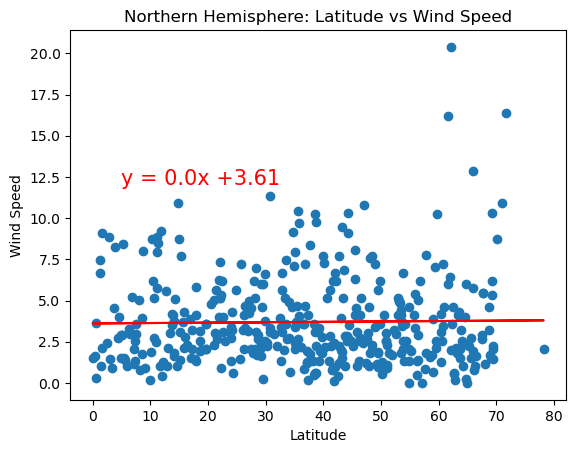

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
hemisphere = "Northern Hemisphere"
plot_linear_regression(x_values,y_values, (5,12), "Wind Speed", hemisphere)

The r^2-value is: 0.04977206834141572


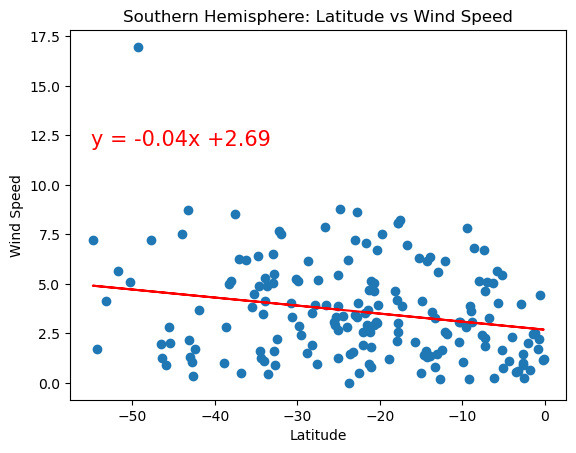

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
hemisphere = "Southern Hemisphere"
plot_linear_regression(x_values,y_values, (-55,12), "Wind Speed", hemisphere)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the basically flat slope indicates no relationship between wind speed with latitude, while the Southern Hemisphere shows a negative slope, suggesting a slight decrease in wind speed as latitude approaches the equator. Both plots exhibit a very weak relationships, as indicated by the nearly flat slopes and high variability in wind speed.

Both hemispheres have nearly zero r2 values, which indicates negligible to no correlation between latitude and wind speed. 

**Conclusion:**

Wind speed shows a weak and inconsistent correlation with latitude in both hemispheres, with minimal differences in patterns. External factors seem to have a greater impact on wind speed than latitude. These could be ocean coverage, ocean currents, costline topography, seasons, and earth's rotation are possible examples of external factors that can affect wind speed. 